# Redes Neuronales Multicapa con Tensorflow 
Aqui aprenderemos a como utilizar el modo de Eager Execution o de computacion de graficas dinamica de tensorflow para hacer clasificacion y regresion 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

% matplotlib inline 

In [ ]:
# Habilitar eager execution mode
tf.enable_eager_execution()

## Modelos en Tensorflow

In [ ]:
# Estructura para un modelo en Tensorflow y Keras
class Modelo(tf.keras.Model):
  
    def  __init__(self):
        super().__init()
        # Estructura de la Red Neuronal 
        
    # Forward Propagation
    def call(self, inputs):
        # Modelo
        return outputs
      
    # Inferencia  
    def predict(self,inputs):
      output= self(inputs)
      return output

## Regresion Lineal 

In [ ]:
class Linear(tf.keras.Model):
    """Linear Regresion """
    def __init__(self):
        super().__init__() # Se usa para que la clase herede los atributos de la superclase
        # Estructura  
        # linear Transformation y= WX + b | kernel se refiere a los weights en tf
        self.dense= tf.keras.layers.Dense(units=1, kernel_initializer=tf.zeros_initializer( ), bias_initializer=tf.zeros_initializer())\
        
    # Forward Propagation | invocacion del modelo con el metodo call 
    def call(self,inputs):
        output=self.dense(inputs)
        return output
    
    def predict(self,inputs):
        # Inference
        pred= self(inputs)
        return pred

In [ ]:
modelo=Linear()

### Datos

In [ ]:
X = tf.constant([[2.0,5.0,3.0],[7.0,5.0,8.0]])
# [batch, 3]
y= tf.constant([[10.0],[20.0]])

In [ ]:
# Optimizador
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Gradient Descent or Training
for i in  range(100):
    # Gradient Tape para hacer un track de las operaciones y asi obtener los gradientes
    with tf.GradientTape() as tape:
        # Forward prop 
        y_pred=modelo(X)
        # loss function
        loss =tf.reduce_mean(tf.square(y_pred-y))
        print(f'Batch : {i},  loss: {loss.numpy()}')
        
    # Gradients  
    grads= tape.gradient(loss, modelo.variables)
    # tupla con los weights y gradientes p.e. (W1, dW1)   
    optimizer.apply_gradients(grads_and_vars=zip(grads,modelo.variables))
    

Batch : 0,  loss: 250.0
Batch : 1,  loss: 123.26494598388672
Batch : 2,  loss: 60.78007125854492
Batch : 3,  loss: 29.972370147705078
Batch : 4,  loss: 14.782464981079102
Batch : 5,  loss: 7.292658805847168
Batch : 6,  loss: 3.5993192195892334
Batch : 7,  loss: 1.77783203125
Batch : 8,  loss: 0.8793041706085205
Batch : 9,  loss: 0.4358898401260376
Batch : 10,  loss: 0.21692103147506714
Batch : 11,  loss: 0.1086622104048729
Batch : 12,  loss: 0.05503081530332565
Batch : 13,  loss: 0.028370710089802742
Batch : 14,  loss: 0.015041744336485863
Batch : 15,  loss: 0.008312713354825974
Batch : 16,  loss: 0.004860876593738794
Batch : 17,  loss: 0.003044913522899151
Batch : 18,  loss: 0.0020524722058326006
Batch : 19,  loss: 0.0014807602856308222
Batch : 20,  loss: 0.0011286851949989796
Batch : 21,  loss: 0.0008955242810770869
Batch : 22,  loss: 0.0007297615520656109
Batch : 23,  loss: 0.0006049213698133826
Batch : 24,  loss: 0.0005066969897598028
Batch : 25,  loss: 0.00042709417175501585
Batch

In [ ]:
modelo.predict(tf.constant([[2.0,5.0,3.0],[7.0,5.0,8.0]]))

<tf.Tensor: id=2428, shape=(2, 1), dtype=float32, numpy=
array([[ 9.999941],
       [20.00003 ]], dtype=float32)>

## Clasificacion en Tensorflow 
The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).
![alt text](https://camo.githubusercontent.com/b06741b45df8ffe29c7de999ab2ec4ff6b2965ba/687474703a2f2f6e657572616c6e6574776f726b73616e64646565706c6561726e696e672e636f6d2f696d616765732f6d6e6973745f3130305f6469676974732e706e67)

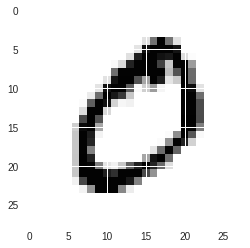

In [ ]:
(X_train, y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()
x= X_train.astype(np.float32)/255.0
plt.imshow(x[1,:,:])

In [ ]:
class DataLoader():
    """Load data MNIST """
    def __init__(self):
        # Download data
        (self.X_train, self.y_train),(self.X_test,self.y_test)= tf.keras.datasets.mnist.load_data()
        # Preprocessing
        self.X_train = self.X_train.reshape(-1, 28*28).astype(np.float32)/255.0 # Debe ser de la forma [batch, num_caracteristicas]
        self.X_test = self.X_test.reshape(-1, 28*28).astype(np.float32)/255.0
        self.y_train=self.y_train.astype(np.int32)
        self.y_test=self.y_test.astype(np.int32)
        
    def get_batch(self,batch_size):
        # Muestreo aleatorio de los datos de la forma [0, stop, size]
        index=np.random.randint(0, self.X_train.shape[0], batch_size)
        return self.X_train[index,:], self.y_train[index]

### Modelo de Clasificacion
![alt text](https://www.researchgate.net/profile/Martin_Musiol/publication/308414212/figure/fig1/AS:409040078295040@1474534162122/A-general-model-of-a-deep-neural-network-It-consists-of-an-input-layer-some-here-two.png)

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
class NeuralNet(tf.keras.Model):
  
    """ Neural Network for classification"""
    def __init__(self):
        super(NeuralNet, self).__init__()
        # Definir la estructura
        self.dense1 = Dense(units=100, activation=tf.nn.relu)
        # Feature vector
        self.dense2 = Dense(units=10) 
        
    def call(self, inputs):
        layer1=self.dense1(inputs) # procesar [bacth, num_features]
        output=self.dense2(layer1)
        return output
    
    def predict(self, inputs):
        # retorna el indice con el maximo valor 
        return tf.argmax(self(inputs), axis=-1)
      
    def evaluate(self, X_test, y_test):
        y_pred= self.predict(X_test).numpy()
        total_test_samples=y_test.shape[0]
        print("Validation Accuracy: %f " % (sum(y_pred==data_loader.y_test)/total_test_samples))
        

In [ ]:
# hyperparametrs
batch_size=64
epochs= 10000
learning_rate=0.001


In [ ]:
data_loader=DataLoader()
modelo=NeuralNet()
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)

### Training

In [96]:
for epoch in range(epochs):
    # Datos muestreados
    X,y = data_loader.get_batch(batch_size)
    
    
    with tf.GradientTape() as tape:
        # Forward prop
        y_pred=modelo(tf.convert_to_tensor(X))
        # Loss function
        loss= tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_pred)
        if epoch%500==0:
          print(f'epoch: {epoch}, loss: {loss.numpy()}')
    
    # Backprop para obtener gradientes
    grads=tape.gradient(loss, modelo.variables)
    # Update rule para encontrar los parametros y minimizar el error
    optimizer.apply_gradients(grads_and_vars=zip(grads,modelo.variables))

epoch: 0, loss: 0.01820523850619793
epoch: 500, loss: 0.013088256120681763
epoch: 1000, loss: 0.08652612566947937
epoch: 1500, loss: 0.05689244717359543
epoch: 2000, loss: 0.011914856731891632
epoch: 2500, loss: 0.03463459014892578
epoch: 3000, loss: 0.004508263431489468
epoch: 3500, loss: 0.023471778258681297
epoch: 4000, loss: 0.007177773397415876
epoch: 4500, loss: 0.023210730403661728


### Evaluation 

In [91]:
modelo.evaluate(data_loader.X_test, data_loader.y_test)

Validation Accuracy: 0.973900 


#### Confusion Matrix

In [ ]:
# Inferencia
y_pred= modelo.predict(data_loader.X_test).numpy()

# Confusion Matrix
confMatrix=tf.confusion_matrix(data_loader.y_test, y_pred).numpy()



In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label\n accuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.tight_layout()

Confusion matrix, without normalization


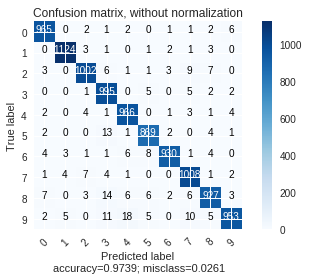

In [94]:
np.set_printoptions(precision=2)
class_names= np.array([0,1,2,3,4,5,6,7,8,9])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMatrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Normalized confusion matrix


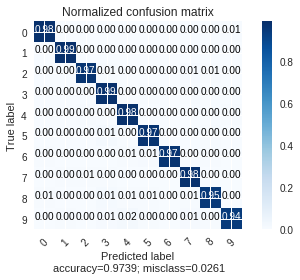

In [95]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMatrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()